In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("C:/Users\snehd/Downloads/Thesis Dataset.csv")
dataset.head()

,Timestamp,"Informed Consent \nI am conducting a research on understanding the relationship between social media usage, content consumption preferences, social-media self representation and self esteem. I am investigating this to see whether social media usage and content preferences mediate the relationship between social-media self representation and self esteem of people. The findings of this research study may contribute to a better understanding of the impact of social media on mental health. \n\nIf you choose to participate in the same, you will be asked to complete this online questionnaire that will take approximately 10 minutes. All questions will be multiple-choice and Likert-type scale. The risks associated with participating in this study are minimal. Some questions may be personal and sensitive in nature, which could cause mild discomfort. However, your responses will be kept confidential, and your participation is voluntary. If you experience any discomfort or wish to withdraw from the study, you may do so at any time.\n\nTaking part in this project is entirely up to you, and no one will hold it against you if you decide not to do it. If you do take part, you may stop at any time without penalty. If you want to know more about this research project, please contact me at snehdeep2000@gmail.com, thank you!\n \n",D1,D2,D3,SM1,SM2,SM3,SMSP1,SMSP2,...,SE1,SE2,SE3,SE4,SE5,SE6,SE7,SE8,SE9,SE10
0,10/2/2024 13:42,I Consent,45-54,Female,Master's Degree,Multiple times a day,Facebook,"Text posts, Images, Videos",Disagree,Disagree,...,Agree,Somewhat Agree,Agree,Somewhat Agree,Somewhat Agree,Agree,Agree,Agree,Agree,Agree
1,10/2/2024 14:17,I Consent,45-54,Male,Master's Degree,Once a day,"Instagram, Twitter, LinkedIn","Text posts, Images, Videos, News articles",Neutral,Neutral,...,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree
2,10/2/2024 18:43,I Consent,45-54,Female,Master's Degree,Multiple times a day,"Facebook, Instagram, Pinterest","Images, Videos, Memes",Disagree,Agree,...,Strongly Agree,Somewhat Agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,12/2/2024 23:53,I Consent,18-24,Female,Master's Degree,Multiple times a day,"Facebook, Instagram, LinkedIn, Pinterest","Text posts, Videos, Memes",Agree,Agree,...,Somewhat Disagree,Somewhat Agree,Strongly Agree,Agree,Agree,Agree,Strongly Agree,Agree,Somewhat Agree,Somewhat Agree
4,14/02/2024 13:05:28,I Consent,25-34,Male,Master's Degree,Multiple times a day,"Facebook, LinkedIn","Videos, News articles",Neutral,Neutral,...,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Somewhat Agree,Agree,Agree,Agree


In [3]:
dataset = dataset.drop(dataset.columns[:2],axis=1)
dataset.head()

,D1,D2,D3,SM1,SM2,SM3,SMSP1,SMSP2,SMSP3,SMSP4,...,SE1,SE2,SE3,SE4,SE5,SE6,SE7,SE8,SE9,SE10
0,45-54,Female,Master's Degree,Multiple times a day,Facebook,"Text posts, Images, Videos",Disagree,Disagree,Agree,Disagree,...,Agree,Somewhat Agree,Agree,Somewhat Agree,Somewhat Agree,Agree,Agree,Agree,Agree,Agree
1,45-54,Male,Master's Degree,Once a day,"Instagram, Twitter, LinkedIn","Text posts, Images, Videos, News articles",Neutral,Neutral,Neutral,Neutral,...,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree
2,45-54,Female,Master's Degree,Multiple times a day,"Facebook, Instagram, Pinterest","Images, Videos, Memes",Disagree,Agree,Strongly Agree,Strongly Disagree,...,Strongly Agree,Somewhat Agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree
3,18-24,Female,Master's Degree,Multiple times a day,"Facebook, Instagram, LinkedIn, Pinterest","Text posts, Videos, Memes",Agree,Agree,Neutral,Disagree,...,Somewhat Disagree,Somewhat Agree,Strongly Agree,Agree,Agree,Agree,Strongly Agree,Agree,Somewhat Agree,Somewhat Agree
4,25-34,Male,Master's Degree,Multiple times a day,"Facebook, LinkedIn","Videos, News articles",Neutral,Neutral,Neutral,Neutral,...,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Somewhat Agree,Agree,Agree,Agree


In [4]:
dataset.shape

(133, 33)

In [5]:
print(dataset["SM2"].unique())

['Facebook' 'Instagram, Twitter, LinkedIn'
 'Facebook, Instagram, Pinterest'
 'Facebook, Instagram, LinkedIn, Pinterest' 'Facebook, LinkedIn'
 'Instagram' 'Facebook, Instagram, Twitter, LinkedIn'
 'Facebook, Instagram, LinkedIn' 'Facebook, Instagram, Pinterest, '
 'Instagram, Snapchat' 'Instagram, WhatsApp, discord, Reddit'
 'Instagram, Twitter, LinkedIn, Pinterest' 'Facebook, Instagram'
 'Instagram, Twitter, LinkedIn, Snapchat'
 'Facebook, Instagram, Twitter, LinkedIn, Pinterest' 'Instagram, Reddit'
 'Instagram, LinkedIn, Pinterest' 'Twitter, Pinterest, WhatsApp'
 'Pinterest, WhatsApp' 'Instagram, LinkedIn, TikTok, Pinterest'
 'Facebook, Twitter' 'Facebook, Instagram, LinkedIn, WhatsApp'
 'Instagram, TikTok' 'Instagram, Pinterest' 'Instagram, LinkedIn'
 'LinkedIn' 'Twitter' 'Twitter, Snapchat' 'LinkedIn, Medium'
 'Facebook, Instagram, LinkedIn, Snapchat'
 'Instagram, LinkedIn, Snapchat, Pinterest'
 'Instagram, Twitter, YouTube, twitch, Reddit' 'Tumblr'
 'LinkedIn, Pinterest' 'Instagra

In [6]:
# Function to expand columns
def expand_columns(dataset, col):
    # Split the column into multiple columns
    expanded_df = dataset[col].str.get_dummies(sep=', ').add_prefix(col + '_')
    return expanded_df

# Expand social_media_platforms column
social_media_expanded = expand_columns(dataset, 'SM2')

# Expand post_types column
post_types_expanded = expand_columns(dataset, 'SM3')

# Concatenate the original DataFrame with the expanded DataFrames
df_expanded = pd.concat([dataset, social_media_expanded, post_types_expanded], axis=1)

# Drop the original columns
df_expanded.drop(['SM2', 'SM3'], axis=1, inplace=True)

print("\nExpanded DataFrame with One-Hot Encoding:")
print(df_expanded)



Expanded DataFrame with One-Hot Encoding:
        D1      D2                 D3                   SM1  \
0    45-54  Female    Master's Degree  Multiple times a day   
1    45-54    Male    Master's Degree            Once a day   
2    45-54  Female    Master's Degree  Multiple times a day   
3    18-24  Female    Master's Degree  Multiple times a day   
4    25-34    Male    Master's Degree  Multiple times a day   
..     ...     ...                ...                   ...   
128  25-34    Male    Master's Degree  Multiple times a day   
129  25-34    Male  Bachelor's Degree  Multiple times a day   
130  35-44    Male    Master's Degree  Multiple times a day   
131  25-34  Female    Master's Degree  Multiple times a day   
132  18-24  Female  Bachelor's Degree  Multiple times a day   

                 SMSP1              SMSP2              SMSP3  \
0             Disagree           Disagree              Agree   
1              Neutral            Neutral            Neutral   
2       

In [7]:
df_expanded.head()

,D1,D2,D3,SM1,SMSP1,SMSP2,SMSP3,SMSP4,SMSP5,SMSP6,...,SM3_Images,SM3_Live streams,SM3_Memes,SM3_News articles,SM3_Reels,SM3_Shorts,SM3_Text posts,SM3_Texts,SM3_Videos,SM3_other informative and free resources
0,45-54,Female,Master's Degree,Multiple times a day,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,...,1,0,0,0,0,0,1,0,1,0
1,45-54,Male,Master's Degree,Once a day,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,1,0,0,1,0,0,1,0,1,0
2,45-54,Female,Master's Degree,Multiple times a day,Disagree,Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,...,1,0,1,0,0,0,0,0,1,0
3,18-24,Female,Master's Degree,Multiple times a day,Agree,Agree,Neutral,Disagree,Neutral,Disagree,...,0,0,1,0,0,0,1,0,1,0
4,25-34,Male,Master's Degree,Multiple times a day,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,...,0,0,0,1,0,0,0,0,1,0


In [8]:
df_expanded.columns

Index(['D1', 'D2', 'D3', 'SM1', 'SMSP1', 'SMSP2', 'SMSP3', 'SMSP4', 'SMSP5',
       'SMSP6', 'SMSP7', 'SMSP8', 'SMSP9', 'SMSP10', 'SMSP11', 'SMSP12',
       'SMSP13', 'SMSP14', 'SMSP15', 'SMSP16', 'SMSP17', 'SE1', 'SE2', 'SE3',
       'SE4', 'SE5', 'SE6', 'SE7', 'SE8', 'SE9', 'SE10', 'SM2_Facebook',
       'SM2_Instagram', 'SM2_LinkedIn', 'SM2_Medium', 'SM2_Pinterest',
       'SM2_Reddit', 'SM2_Shopping websites', 'SM2_Snapchat', 'SM2_TikTok',
       'SM2_Tumblr', 'SM2_Twitter', 'SM2_WhatsApp', 'SM2_YouTube',
       'SM2_discord', 'SM2_twitch', 'SM3_Images', 'SM3_Live streams',
       'SM3_Memes', 'SM3_News articles', 'SM3_Reels', 'SM3_Shorts',
       'SM3_Text posts', 'SM3_Texts', 'SM3_Videos',
       'SM3_other informative and free resources'],
      dtype='object')

In [9]:
##Univariate Analysis
import matplotlib.pyplot as plt

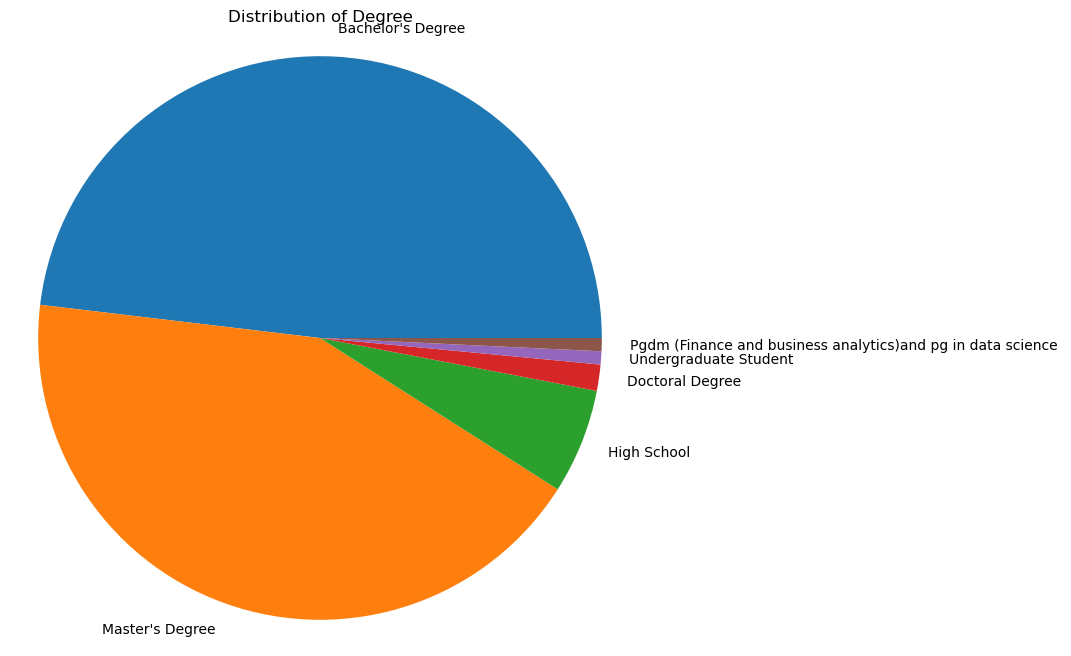

In [10]:
plt.figure(figsize = (8,8))
degree_counts = df_expanded["D3"].value_counts()
plt.pie(degree_counts, labels = degree_counts.index)
plt.title("Distribution of Degree")
plt.axis("equal")
plt.show()

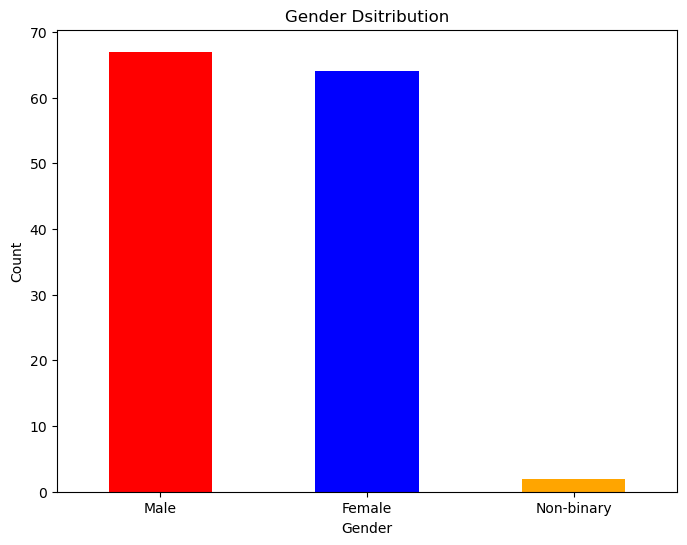

In [11]:
plt.figure(figsize = (8,6))
gender_counts = df_expanded["D2"].value_counts()
gender_counts.plot(kind = "bar", color = ["Red","Blue","Orange"])
plt.title("Gender Dsitribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

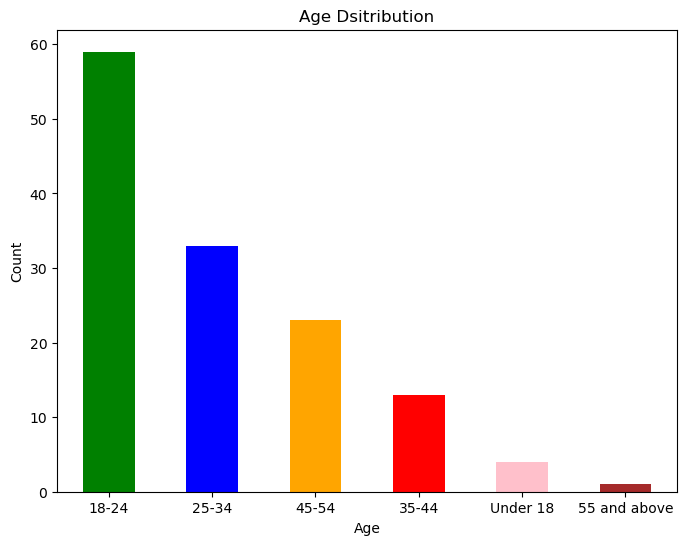

In [12]:
plt.figure(figsize = (8,6))
age_bucket_counts = df_expanded["D1"].value_counts()
age_bucket_counts.plot(kind = "bar", color = ["Green","Blue","Orange","Red","Pink","Brown"])
plt.title("Age Dsitribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

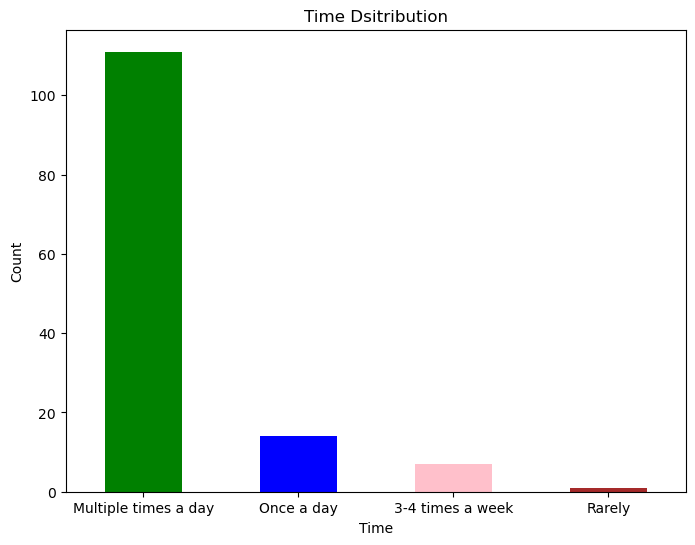

In [13]:
plt.figure(figsize = (8,6))
time_counts = df_expanded["SM1"].value_counts()
time_counts.plot(kind = "bar", color = ["Green","Blue","Pink","Brown"])
plt.title("Time Dsitribution")
plt.xlabel("Time")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

In [14]:
#Bivariate Analysis
age_gender_counts = df_expanded.groupby(['D1', 'D2']).size().unstack()

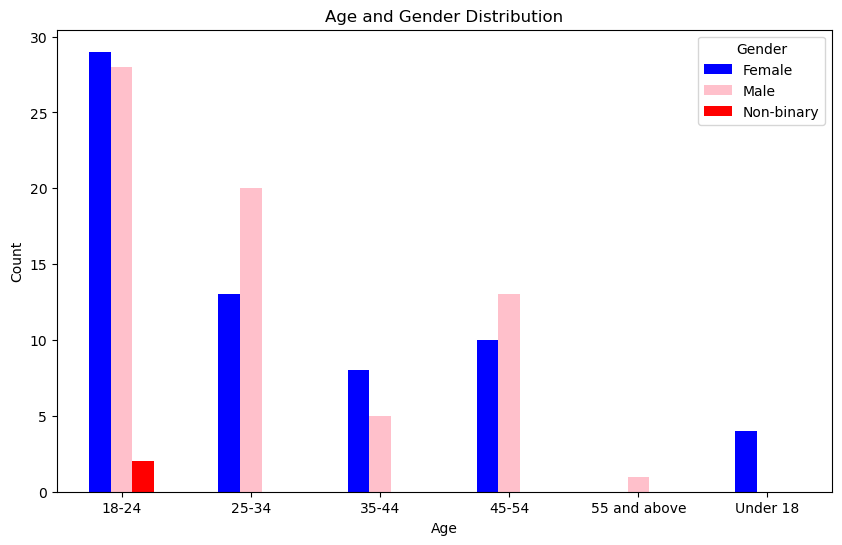

In [15]:
age_gender_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'pink','red'])
plt.title('Age and Gender Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

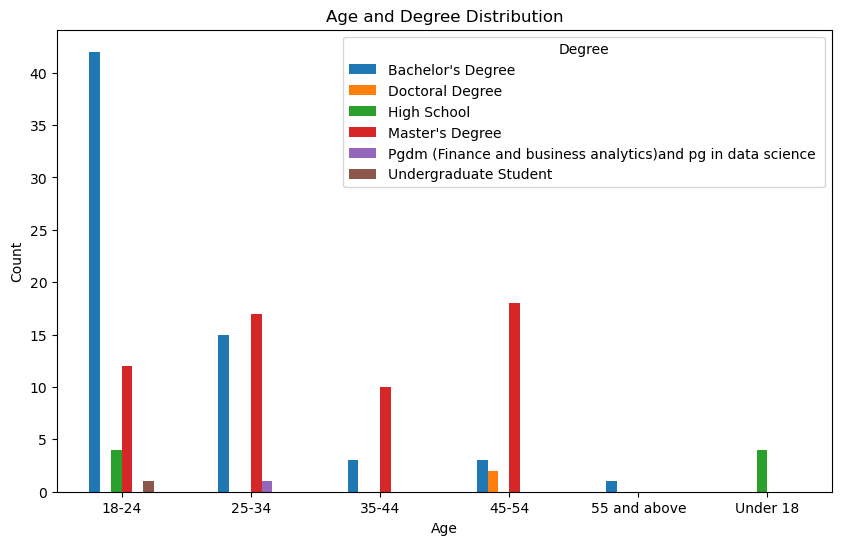

In [16]:
age_degree_counts = df_expanded.groupby(['D1', 'D3']).size().unstack()
age_degree_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Age and Degree Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Degree')
plt.show()

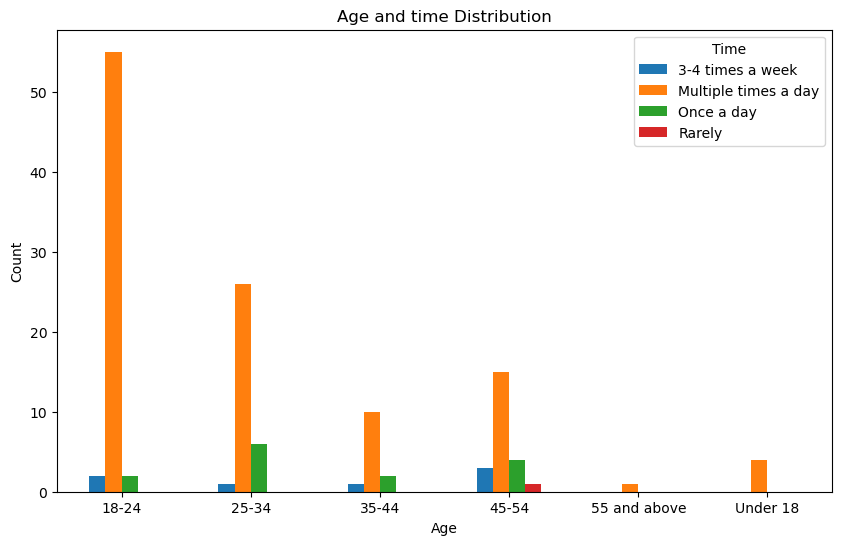

In [17]:
age_time_counts = df_expanded.groupby(['D1', 'SM1']).size().unstack()
age_time_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Age and time Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Time')
plt.show()

In [18]:
#Feature Engineering

In [19]:
df_expanded["D1"].unique()

array(['45-54', '18-24', '25-34', 'Under 18', '35-44', '55 and above'],
      dtype=object)

In [20]:
age_mapping = {
    'Under 18': 9,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55 and above': 77.5
}
df_expanded['D1'] = df_expanded['D1'].map(age_mapping)

In [21]:
df_expanded.head()

,D1,D2,D3,SM1,SMSP1,SMSP2,SMSP3,SMSP4,SMSP5,SMSP6,...,SM3_Images,SM3_Live streams,SM3_Memes,SM3_News articles,SM3_Reels,SM3_Shorts,SM3_Text posts,SM3_Texts,SM3_Videos,SM3_other informative and free resources
0,49.5,Female,Master's Degree,Multiple times a day,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,...,1,0,0,0,0,0,1,0,1,0
1,49.5,Male,Master's Degree,Once a day,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,1,0,0,1,0,0,1,0,1,0
2,49.5,Female,Master's Degree,Multiple times a day,Disagree,Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,...,1,0,1,0,0,0,0,0,1,0
3,21.0,Female,Master's Degree,Multiple times a day,Agree,Agree,Neutral,Disagree,Neutral,Disagree,...,0,0,1,0,0,0,1,0,1,0
4,29.5,Male,Master's Degree,Multiple times a day,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,...,0,0,0,1,0,0,0,0,1,0


In [22]:
df_expanded["D2"].unique()

array(['Female', 'Male', 'Non-binary'], dtype=object)

In [23]:
gender_mapping = {
    'Female': 1,
    'Male': 0,
    'Non-binary': 2
}
df_expanded['D2'] = df_expanded['D2'].map(gender_mapping)

In [24]:
df_expanded.head()

,D1,D2,D3,SM1,SMSP1,SMSP2,SMSP3,SMSP4,SMSP5,SMSP6,...,SM3_Images,SM3_Live streams,SM3_Memes,SM3_News articles,SM3_Reels,SM3_Shorts,SM3_Text posts,SM3_Texts,SM3_Videos,SM3_other informative and free resources
0,49.5,1,Master's Degree,Multiple times a day,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,...,1,0,0,0,0,0,1,0,1,0
1,49.5,0,Master's Degree,Once a day,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,1,0,0,1,0,0,1,0,1,0
2,49.5,1,Master's Degree,Multiple times a day,Disagree,Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,...,1,0,1,0,0,0,0,0,1,0
3,21.0,1,Master's Degree,Multiple times a day,Agree,Agree,Neutral,Disagree,Neutral,Disagree,...,0,0,1,0,0,0,1,0,1,0
4,29.5,0,Master's Degree,Multiple times a day,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,...,0,0,0,1,0,0,0,0,1,0


In [25]:
df_expanded["D3"].unique()

array(["Master's Degree", "Bachelor's Degree", 'High School',
       'Undergraduate Student ', 'Doctoral Degree',
       'Pgdm (Finance and business analytics)and pg in data science '],
      dtype=object)

In [26]:
degree_one_hot = pd.get_dummies(df_expanded['D3'])
degree_one_hot = degree_one_hot.astype(int)

In [27]:
df_expanded.drop('D3',axis=1,inplace=True)

In [28]:
df_expanded=pd.concat([df_expanded,degree_one_hot],axis=1)

In [29]:
df_expanded.head()

,D1,D2,SM1,SMSP1,SMSP2,SMSP3,SMSP4,SMSP5,SMSP6,SMSP7,...,SM3_Text posts,SM3_Texts,SM3_Videos,SM3_other informative and free resources,Bachelor's Degree,Doctoral Degree,High School,Master's Degree,Pgdm (Finance and business analytics)and pg in data science,Undergraduate Student
0,49.5,1,Multiple times a day,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,Disagree,...,1,0,1,0,0,0,0,1,0,0
1,49.5,0,Once a day,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,1,0,1,0,0,0,0,1,0,0
2,49.5,1,Multiple times a day,Disagree,Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,...,0,0,1,0,0,0,0,1,0,0
3,21.0,1,Multiple times a day,Agree,Agree,Neutral,Disagree,Neutral,Disagree,Disagree,...,1,0,1,0,0,0,0,1,0,0
4,29.5,0,Multiple times a day,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,Agree,...,0,0,1,0,0,0,0,1,0,0


In [30]:
time_one_hot = pd.get_dummies(df_expanded['SM1'])
time_one_hot = time_one_hot.astype(int)

In [31]:
df_expanded.drop('SM1',axis=1,inplace=True)

In [32]:
df_expanded=pd.concat([df_expanded,time_one_hot],axis=1)

In [33]:
df_expanded.head()

,D1,D2,SMSP1,SMSP2,SMSP3,SMSP4,SMSP5,SMSP6,SMSP7,SMSP8,...,Bachelor's Degree,Doctoral Degree,High School,Master's Degree,Pgdm (Finance and business analytics)and pg in data science,Undergraduate Student,3-4 times a week,Multiple times a day,Once a day,Rarely
0,49.5,1,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,Disagree,Disagree,...,0,0,0,1,0,0,0,1,0,0
1,49.5,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,0,0,0,1,0,0,0,0,1,0
2,49.5,1,Disagree,Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,...,0,0,0,1,0,0,0,1,0,0
3,21.0,1,Agree,Agree,Neutral,Disagree,Neutral,Disagree,Disagree,Agree,...,0,0,0,1,0,0,0,1,0,0
4,29.5,0,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,Agree,Neutral,...,0,0,0,1,0,0,0,1,0,0


In [34]:
df_expanded["SMSP1"].unique()

array(['Disagree', 'Neutral', 'Agree', 'Strongly Disagree',
       'Strongly Agree'], dtype=object)

In [35]:
SMSP_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

SMSP_Columns = ['SMSP1', 'SMSP2', 'SMSP3','SMSP4', 'SMSP5',	'SMSP6', 'SMSP7', 'SMSP8', 'SMSP9',	
'SMSP10', 'SMSP11',	'SMSP12', 'SMSP13',	'SMSP14', 'SMSP15',	'SMSP16', 'SMSP17']

df_expanded[SMSP_Columns] = df_expanded[SMSP_Columns].replace(SMSP_mapping)

In [36]:
df_expanded.head()

,D1,D2,SMSP1,SMSP2,SMSP3,SMSP4,SMSP5,SMSP6,SMSP7,SMSP8,...,Bachelor's Degree,Doctoral Degree,High School,Master's Degree,Pgdm (Finance and business analytics)and pg in data science,Undergraduate Student,3-4 times a week,Multiple times a day,Once a day,Rarely
0,49.5,1,2,2,4,2,2,2,2,2,...,0,0,0,1,0,0,0,1,0,0
1,49.5,0,3,3,3,3,3,3,3,3,...,0,0,0,1,0,0,0,0,1,0
2,49.5,1,2,4,5,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
3,21.0,1,4,4,3,2,3,2,2,4,...,0,0,0,1,0,0,0,1,0,0
4,29.5,0,3,3,3,3,2,2,4,3,...,0,0,0,1,0,0,0,1,0,0


In [37]:
df_expanded["SE1"].unique()

array(['Agree', 'Somewhat Disagree', 'Strongly Agree', 'Somewhat Agree',
       'Strongly Disagree', 'Disagree'], dtype=object)

In [38]:
SE_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Somewhat Disagree': 3,
    'Somewhat Agree': 4,
    'Agree': 5,
    'Strongly Agree': 6
}

SE_Columns = ['SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SE8', 'SE9', 'SE10']

df_expanded[SE_Columns] = df_expanded[SE_Columns].replace(SE_mapping)

In [39]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   D1                                                            133 non-null    float64
 1   D2                                                            133 non-null    int64  
 2   SMSP1                                                         133 non-null    int64  
 3   SMSP2                                                         133 non-null    int64  
 4   SMSP3                                                         133 non-null    int64  
 5   SMSP4                                                         133 non-null    int64  
 6   SMSP5                                                         133 non-null    int64  
 7   SMSP6                                                         133 non-n

In [40]:
df_expanded['SMSP_Total'] = df_expanded[SMSP_Columns].sum(axis=1)

In [41]:
df_expanded['SE_Total'] = df_expanded[SE_Columns].sum(axis=1)

In [42]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 66 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   D1                                                            133 non-null    float64
 1   D2                                                            133 non-null    int64  
 2   SMSP1                                                         133 non-null    int64  
 3   SMSP2                                                         133 non-null    int64  
 4   SMSP3                                                         133 non-null    int64  
 5   SMSP4                                                         133 non-null    int64  
 6   SMSP5                                                         133 non-null    int64  
 7   SMSP6                                                         133 non-n

In [43]:
SMSP_bins = [17,42,66,91]
SE_bins = [10,27,44,61]
labels = [1,2,3]

In [44]:
df_expanded['SMSP_Category'] = pd.cut(df_expanded['SMSP_Total'], bins=SMSP_bins, labels=labels, right=False)
df_expanded['SE_Category'] = pd.cut(df_expanded['SE_Total'], bins=SE_bins, labels=labels, right=False)

In [45]:
df_expanded.head()

,D1,D2,SMSP1,SMSP2,SMSP3,SMSP4,SMSP5,SMSP6,SMSP7,SMSP8,...,Pgdm (Finance and business analytics)and pg in data science,Undergraduate Student,3-4 times a week,Multiple times a day,Once a day,Rarely,SMSP_Total,SE_Total,SMSP_Category,SE_Category
0,49.5,1,2,2,4,2,2,2,2,2,...,0,0,0,1,0,0,42,47,2,3
1,49.5,0,3,3,3,3,3,3,3,3,...,0,0,0,0,1,0,51,47,2,3
2,49.5,1,2,4,5,1,1,1,1,1,...,0,0,0,1,0,0,40,53,1,3
3,21.0,1,4,4,3,2,3,2,2,4,...,0,0,0,1,0,0,49,47,2,3
4,29.5,0,3,3,3,3,2,2,4,3,...,0,0,0,1,0,0,49,50,2,3


In [46]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 68 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   D1                                                            133 non-null    float64 
 1   D2                                                            133 non-null    int64   
 2   SMSP1                                                         133 non-null    int64   
 3   SMSP2                                                         133 non-null    int64   
 4   SMSP3                                                         133 non-null    int64   
 5   SMSP4                                                         133 non-null    int64   
 6   SMSP5                                                         133 non-null    int64   
 7   SMSP6                                                         

In [47]:
df_expanded['SMSP_Category'] = df_expanded['SMSP_Category'].astype(int)
df_expanded['SE_Category'] = df_expanded['SE_Category'].astype(int)

In [48]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 68 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   D1                                                            133 non-null    float64
 1   D2                                                            133 non-null    int64  
 2   SMSP1                                                         133 non-null    int64  
 3   SMSP2                                                         133 non-null    int64  
 4   SMSP3                                                         133 non-null    int64  
 5   SMSP4                                                         133 non-null    int64  
 6   SMSP5                                                         133 non-null    int64  
 7   SMSP6                                                         133 non-n

In [49]:
columns_to_drop = SMSP_Columns+SE_Columns

In [50]:
final_df = df_expanded.drop(columns=columns_to_drop)

In [51]:
final_df.head()

,D1,D2,SM2_Facebook,SM2_Instagram,SM2_LinkedIn,SM2_Medium,SM2_Pinterest,SM2_Reddit,SM2_Shopping websites,SM2_Snapchat,...,Pgdm (Finance and business analytics)and pg in data science,Undergraduate Student,3-4 times a week,Multiple times a day,Once a day,Rarely,SMSP_Total,SE_Total,SMSP_Category,SE_Category
0,49.5,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,42,47,2,3
1,49.5,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,51,47,2,3
2,49.5,1,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,40,53,1,3
3,21.0,1,1,1,1,0,1,0,0,0,...,0,0,0,1,0,0,49,47,2,3
4,29.5,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,49,50,2,3


In [52]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 41 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   D1                                                            133 non-null    float64
 1   D2                                                            133 non-null    int64  
 2   SM2_Facebook                                                  133 non-null    int64  
 3   SM2_Instagram                                                 133 non-null    int64  
 4   SM2_LinkedIn                                                  133 non-null    int64  
 5   SM2_Medium                                                    133 non-null    int64  
 6   SM2_Pinterest                                                 133 non-null    int64  
 7   SM2_Reddit                                                    133 non-n

In [53]:
final_df=final_df.drop(columns = ['SMSP_Total', 'SE_Total'])

In [64]:
corr_matrix=final_df.corr()
corr_matrix

,D1,D2,SM2_Facebook,SM2_Instagram,SM2_LinkedIn,SM2_Medium,SM2_Pinterest,SM2_Reddit,SM2_Shopping websites,SM2_Snapchat,...,High School,Master's Degree,Pgdm (Finance and business analytics)and pg in data science,Undergraduate Student,3-4 times a week,Multiple times a day,Once a day,Rarely,SMSP_Category,SE_Category
D1,1.000000,-0.132175,0.558549,-0.377641,0.004091,0.070348,-0.017638,-0.067594,-0.003006,-0.321411,...,-0.317886,0.428497,-0.003006,-0.065357,0.142261,-0.250674,0.159531,0.143702,0.024562,0.274260
D2,-0.132175,1.000000,-0.060294,0.153839,-0.150118,-0.084107,0.431914,-0.192530,0.080396,-0.010507,...,0.233675,-0.061533,-0.084107,-0.084107,0.090435,0.162475,-0.238834,-0.084107,0.034660,-0.127625
SM2_Facebook,0.558549,-0.060294,1.000000,-0.208487,0.116218,-0.062241,-0.006086,-0.141715,0.121716,-0.152148,...,-0.114072,0.408274,-0.062241,-0.062241,0.044947,-0.109335,0.065407,0.121716,0.144129,0.133570
SM2_Instagram,-0.377641,0.153839,-0.208487,1.000000,0.056490,-0.176571,0.107593,-0.078036,0.042905,0.195183,...,0.124705,-0.147773,0.042905,0.042905,-0.308343,0.290816,-0.078036,-0.176571,-0.077256,-0.076405
SM2_LinkedIn,0.004091,-0.150118,0.116218,0.056490,1.000000,0.083826,-0.004191,-0.110972,0.083826,0.057346,...,-0.072808,0.073849,0.083826,-0.090375,0.092219,-0.064253,0.036131,-0.090375,-0.123957,0.136881
SM2_Medium,0.070348,-0.084107,-0.062241,-0.176571,0.083826,1.000000,-0.050000,-0.029854,-0.007576,-0.042905,...,-0.022019,0.100504,-0.007576,-0.007576,-0.020515,0.038749,-0.029854,-0.007576,0.085171,0.050109
SM2_Pinterest,-0.017638,0.431914,-0.006086,0.107593,-0.004191,-0.050000,1.000000,-0.083591,0.151515,-0.063697,...,0.074315,0.030151,-0.050000,-0.050000,0.098473,0.021488,-0.083591,-0.050000,0.088731,0.026057
SM2_Reddit,-0.067594,-0.192530,-0.141715,-0.078036,-0.110972,-0.029854,-0.083591,1.000000,-0.029854,0.078036,...,-0.086772,-0.198030,-0.029854,-0.029854,0.028873,0.020823,-0.037815,-0.029854,-0.235448,-0.016926
SM2_Shopping websites,-0.003006,0.080396,0.121716,0.042905,0.083826,-0.007576,0.151515,-0.029854,1.000000,0.176571,...,-0.022019,0.100504,-0.007576,-0.007576,-0.020515,0.038749,-0.029854,-0.007576,-0.083900,-0.330719
SM2_Snapchat,-0.321411,-0.010507,-0.152148,0.195183,0.057346,-0.042905,-0.063697,0.078036,0.176571,1.000000,...,-0.044966,-0.082096,-0.042905,-0.042905,-0.031281,0.117401,-0.107299,-0.042905,0.003600,-0.255411


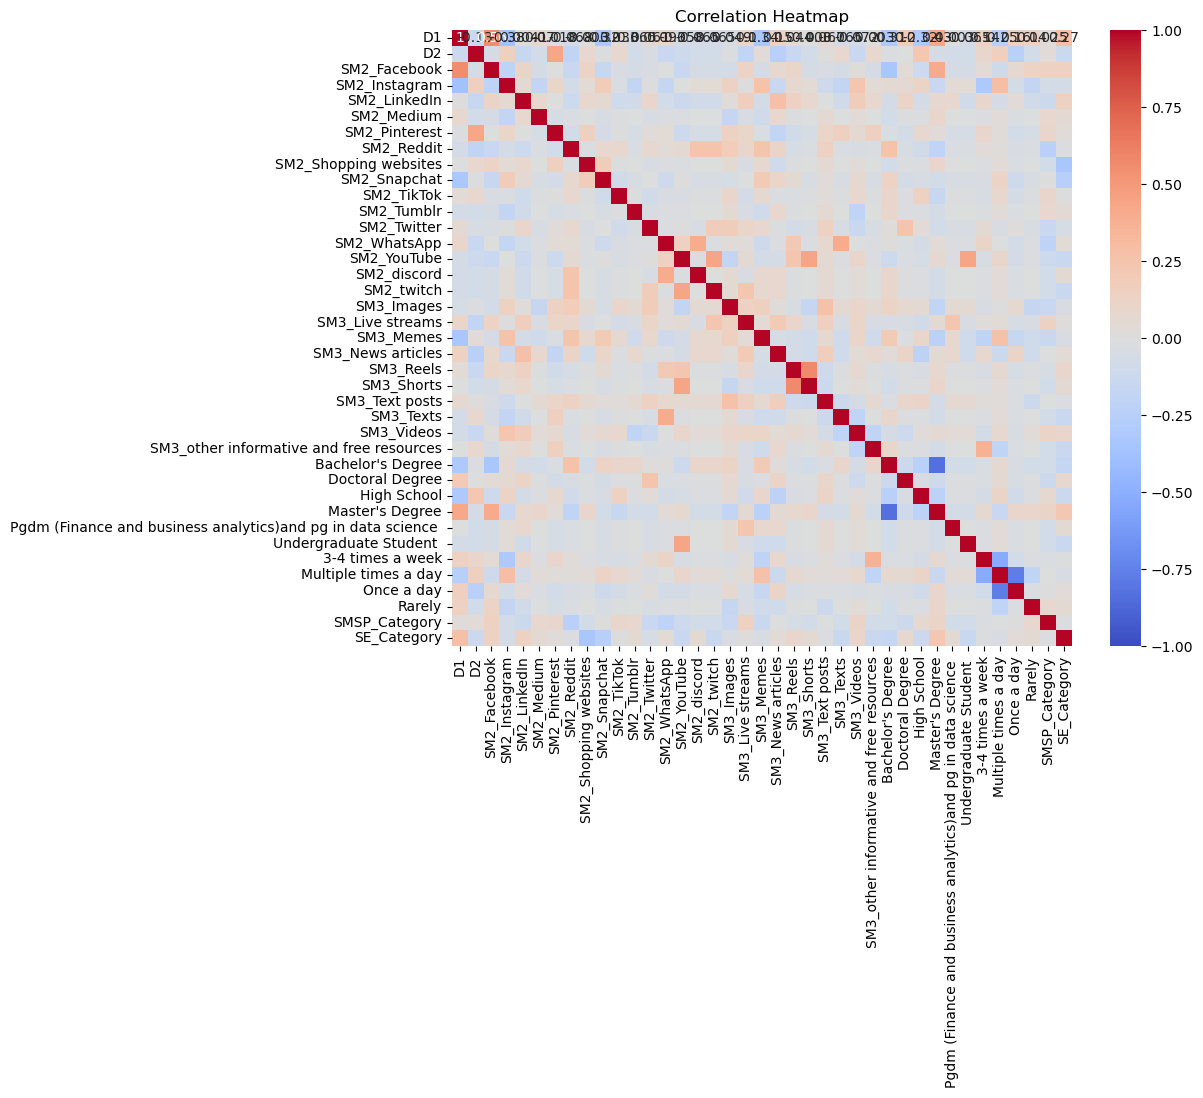

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [56]:
X=final_df.drop(columns=['SE_Category'])
y=final_df['SE_Category']

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import numpy as np

In [58]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
residuals = model.resid
predicted = model.fittedvalues

                            OLS Regression Results                            
Dep. Variable:            SE_Category   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1.784
Date:                Sat, 10 Aug 2024   Prob (F-statistic):             0.0136
Time:                        12:32:19   Log-Likelihood:                -50.544
No. Observations:                 133   AIC:                             175.1
Df Residuals:                      96   BIC:                             282.0
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Text(0, 0.5, 'Residuals')

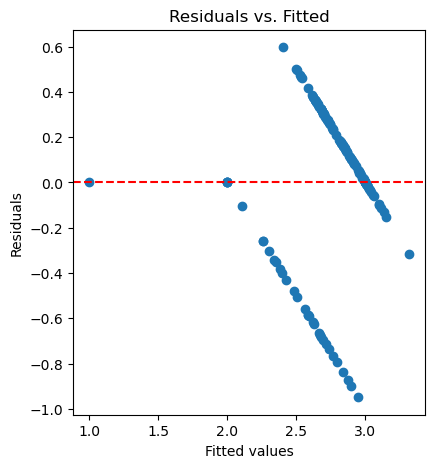

In [59]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

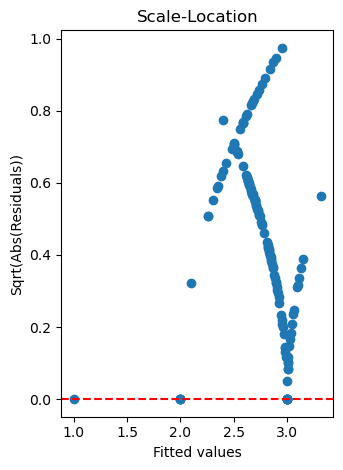

In [60]:
plt.subplot(1, 2, 2)
plt.scatter(predicted, np.sqrt(np.abs(residuals)))
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(Abs(Residuals))')

plt.tight_layout()
plt.show()

C:\Users\snehd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


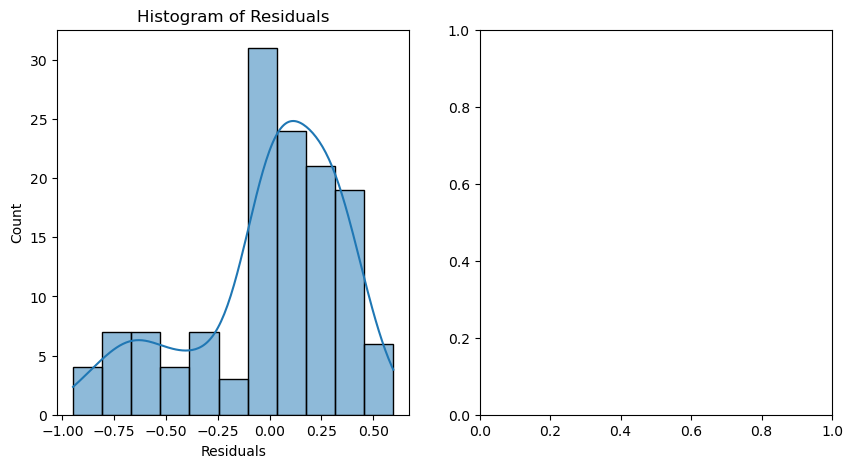

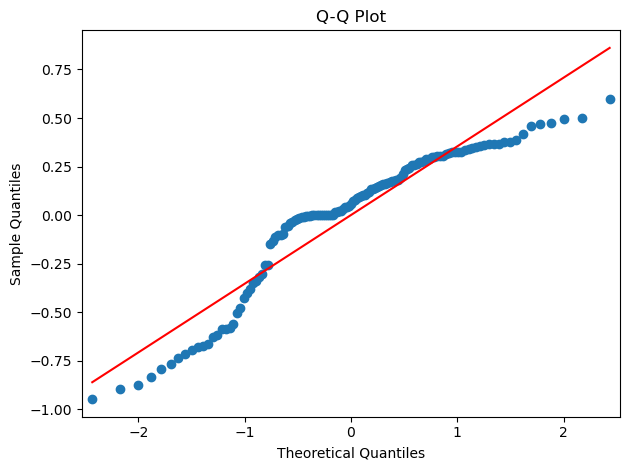

In [61]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [62]:
# 5. Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                                              feature       VIF
0                                               const  0.000000
1                                                  D1  2.852198
2                                                  D2  1.880974
3                                        SM2_Facebook  2.003720
4                                       SM2_Instagram  1.982268
5                                        SM2_LinkedIn  1.536732
6                                          SM2_Medium  1.176416
7                                       SM2_Pinterest  1.594068
8                                          SM2_Reddit  1.573724
9                               SM2_Shopping websites  1.171971
10                                       SM2_Snapchat  1.420246
11                                         SM2_TikTok  1.153623
12                                         SM2_Tumblr  1.211104
13                                        SM2_Twitter  1.311782
14                                      

C:\Users\snehd\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\snehd\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [65]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Store results
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred)
    }

# Print the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result["classification_report"])
    print("\n" + "-"*50 + "\n")


C:\Users\snehd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\snehd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\snehd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Model: Logistic Regression
Accuracy: 0.7037
Classification Report:
              precision    recall  f1-score   support

           2       0.43      0.43      0.43         7
           3       0.80      0.80      0.80        20

    accuracy                           0.70        27
   macro avg       0.61      0.61      0.61        27
weighted avg       0.70      0.70      0.70        27


--------------------------------------------------

Model: K-Nearest Neighbors
Accuracy: 0.7037
Classification Report:
              precision    recall  f1-score   support

           2       0.40      0.29      0.33         7
           3       0.77      0.85      0.81        20

    accuracy                           0.70        27
   macro avg       0.59      0.57      0.57        27
weighted avg       0.68      0.70      0.69        27


--------------------------------------------------

Model: Support Vector Machine
Accuracy: 0.7407
Classification Report:
              precision    recall  f

C:\Users\snehd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\snehd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\snehd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
